In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [ ]:
# Logistic Regression with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        # eta: learning rate
        # n_iter: number of passes (epochs) over the training data
        # random_state: for reproducibility of random weight initialization
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        # Initialize weights with small random numbers and bias to 0
        rgen = np.random.RandomState(self.random_state)
        #loc means mean(weight is centered at 0.0), scale means standard deviation(0.01)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # weight vector
        self.b_ = np.float_(0.)  # bias term
        self.losses_ = []  # list to store loss values in each epoch

        # Training loop
        for i in range(self.n_iter):
            net_input = self.net_input(X)              # Linear combination of inputs
            output = self.activation(net_input)        # Apply sigmoid to get probability
            errors = y - output                        # Difference between true and predicted
            
            # Update weights and bias using gradient descent
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()

            # Compute logistic loss (cross-entropy) and store it
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))) / X.shape[0]
            self.losses_.append(loss)

        return self  # Return the trained model

    def net_input(self, X):
        # Computes linear combination z = w^T * x + b
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        # Applies sigmoid activation to squash output between 0 and 1
        # np.clip used to avoid overflow in exp()
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        # Returns binary class label (0 or 1) using threshold at 0.5
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


C:\Users\Asus\AppData\Local\Temp\ipykernel_31756\820144512.py:58: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


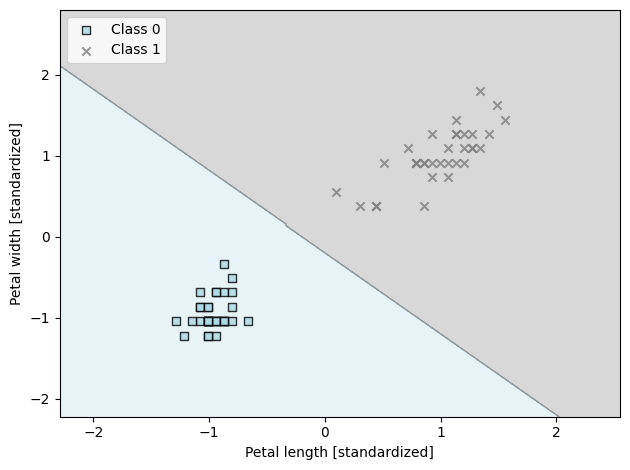

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

# Select only classes 0 and 1
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

# Standardize features
sc = StandardScaler()
X_std = sc.fit_transform(X)

# Split into training and test sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1)

# Train logistic regression model
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train, y_train)

# Plot decision boundary
plot_decision_regions(X_train, y_train, classifier=lrgd)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
